
## Group Members - Belo Abhigyan (16) & Chetan Verma (18)

## Course: MSc CS

## Semester: III

# Temperature Prediction



---

# Comprehensive Insights for this Deep Learning Assignment  

## My Journey Through Time Series Prediction and Neural Network Architectures  

### 🔍 Dataset Exploration: Melbourne Temperature Dataset (kaggle)

#### Data Characteristics  
In this assignment, we are Working with the Melbourne Temperature Dataset, which spans daily minimum temperatures from 1981 to 1990, presents us with a unique set of challenges. These included complex preprocessing requirements, inconsistencies in CSV formatting, and the need to understand complex temporal patterns in temperature fluctuations.  

#### Preprocessing Revelations  
To tackle these issues, We focused on:  

1. **Data Cleaning Strategies**  
   - Parsing columns catiously to identify and resolve inconsistencies in the data  
   - Addressing missing or malformed entries effectively to ensure data quality.  
   - Standardizing datetime and numeric representations for seamless processing.  

2. **Normalization Techniques**  
   - We utilized the MinMaxScaler to normalize temperature values to a [0, 1] range while preserving relative variations. This step significantly enhanced the model's ability to interpret the data consistently.  

### 🧠 Convolutional Neural Networks (CNNs): Layer Depth Insights  

#### Performance Dynamics of Layer Complexity  

Through experimentation with CNN architectures, We discovered that deeper networks do not always guarantee better performance. Optimizing layer depth required a delicate balance to enhance feature extraction without introducing inefficiencies.  

**Performance Progression**:  
1. **Initial Layer Additions**  
   - Strengthened the ability to capture complex patterns in the data.  
   - Improved the representational power by extracting increasingly abstract features.  

2. **Diminishing Returns**  
   - Beyond a certain depth, performance gains plateaued.  
   - Overly complex architectures risked inefficiencies and overfitting.  

**Performance Degradation Mechanisms**:  
- **Gradient-Related Issues**  
  - Vanishing gradients hindered learning in deeper layers.  
  - Exploding gradients sometimes destabilized the training process.  

- **Complexity-Induced Limitations**  
  - Excessive complexity reduced generalization capabilities and increased the likelihood of overfitting.  

**Mitigation Strategies We Recommend**:  
1. Residual Connections (ResNet) to facilitate better gradient flow.  
2. Advanced normalization techniques like Batch and Layer Normalization.  
3. Regularization approaches such as Dropout, L1/L2 regularization, and early stopping to prevent overfitting.  

### 🌊 Recurrent Neural Networks (RNNs): Sequence Length Dynamics  

#### Dependency Learning Challenges  

When working with RNNs, we observed that sequence length introduces significant trade-offs between capturing context and computational efficiency.  

**Challenges We Encountered**:  
1. **Gradient Propagation Limitations**  
   - Long sequences suffered from vanishing gradients, reducing the model's ability to capture dependencies effectively.  
   - Computational complexity increased significantly with sequence length.  

2. **Memory Constraints**  
   - Longer sequences strained memory allocation and introduced potential bottlenecks.  

**Practical Mitigation Techniques**:  
1. Leveraging advanced RNN architectures like LSTMs and GRUs to capture long-term dependencies.  
2. Implementing attention mechanisms for dynamic context allocation and improved focus on critical sequence elements.  
3. Employing computational strategies such as gradient clipping and truncated backpropagation for stability.  

### 🔬 Empirical Insights and Recommendations  

**Key Takeaways from Our Experience**:  
Designing neural networks isn't a piece of cake . There is no one-size-fits-all solution, and context-specific optimization is crucial.  

**Our Approach**:  
1. Starting with baseline architectures and incrementally adding complexity.  
2. Validating performance rigorously at every step.  
3. Using systematic hyperparameter tuning to refine models.  
4. Incorporating domain-specific knowledge to guide architectural decisions.  


**Personal Reflection**:  
In future thoda time zyada dedo sir and if possible 11:59 pm as a deadline sounds good than 17:00 pm (dopher mein sona bhi hota hai)

---  

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

def load_and_clean_data(file_path):
    try:
        # Try reading with default settings
        df = pd.read_csv(file_path)

        # If the first column looks like the entire data
        if len(df.columns) == 1:
            # Try splitting the single column
            try:
                # Attempt to split the column into Date and Temp
                df[['Date', 'Temp']] = df.iloc[:, 0].str.split(',', expand=True)
            except:
                # If splitting fails, try reading with different delimiters
                df = pd.read_csv(file_path, delimiter='\t')  # Try tab delimiter

        # Ensure we have Date and Temp columns
        if 'Date' not in df.columns or 'Temp' not in df.columns:
            # Rename columns if they're not correctly named
            df.columns = ['Date', 'Temp'] if len(df.columns) >= 2 else ['Temp']

        # Convert Date to datetime
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

        # Convert Temp to numeric, removing any non-numeric characters
        df['Temp'] = pd.to_numeric(df['Temp'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

        # Drop any rows with NaN values
        df = df.dropna()

        # Set Date as index if not already
        if 'Date' in df.columns:
            df = df.set_index('Date')

        return df

    except Exception as e:
        print(f"Error loading data: {e}")
        # If all else fails, try a more manual approach
        with open(file_path, 'r') as f:
            lines = f.readlines()
            # Print problematic line to help diagnose the issue
            print("Problematic line:", lines[3652])
        raise


In [ ]:
# RNN Model with input dimension handling
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Ensure input is 3D: (batch_size, sequence_length, input_size)
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Ensure x is 3D
        if x.dim() == 2:
            x = x.unsqueeze(2)  # Add channel dimension if missing

        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # RNN forward pass
        out, _ = self.rnn(x, h0)

        # Take the last time step
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Ensure x is 3D
        if x.dim() == 2:
            x = x.unsqueeze(2)

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, nhead, num_layers, hidden_dim):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_dim)
        encoder_layers = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # Ensure x is 3D
        if x.dim() == 2:
            x = x.unsqueeze(2)

        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Change to (seq_len, batch, features)
        out = self.transformer_encoder(x)
        out = out[-1]  # Take the last timestep
        return self.fc(out)


In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)



In [ ]:
def train_regression_model(model, dataloader, criterion, optimizer, device, epochs=5, early_stopping_patience=5):
    model.train()
    history = {'train_loss': []}
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        running_loss = 0.0
        for sequences, targets in dataloader:
            sequences = sequences.to(device)
            targets = targets.to(device)
            optimizer.zero_grad()

            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(dataloader)
        history['train_loss'].append(epoch_loss)

        # Early stopping logic
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break

        print(f'Epoch [{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}')

    return history

In [ ]:
def evaluate_regression_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    predictions = []
    actuals = []

    with torch.no_grad():
        for sequences, targets in dataloader:
            sequences = sequences.to(device)
            targets = targets.to(device)

            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), targets)
            total_loss += loss.item()

            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    return avg_loss, predictions, actuals

In [ ]:
def plot_training_history(history, metric='loss'):
    plt.figure(figsize=(10, 5))
    plt.plot(history[f'train_{metric}'])
    plt.title(f'Training {metric.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

def load_and_clean_data(file_path):
    try:
        # Try reading with default settings
        df = pd.read_csv(file_path)

        # If the first column looks like the entire data
        if len(df.columns) == 1:
            # Try splitting the single column
            try:
                # Attempt to split the column into Date and Temp
                df[['Date', 'Temp']] = df.iloc[:, 0].str.split(',', expand=True)
            except:
                # If splitting fails, try reading with different delimiters
                df = pd.read_csv(file_path, delimiter='\t')  # Try tab delimiter

        # Ensure we have Date and Temp columns
        if 'Date' not in df.columns or 'Temp' not in df.columns:
            # Rename columns if they're not correctly named
            df.columns = ['Date', 'Temp'] if len(df.columns) >= 2 else ['Temp']

        # Convert Date to datetime
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

        # Convert Temp to numeric, removing any non-numeric characters
        df['Temp'] = pd.to_numeric(df['Temp'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

        # Drop any rows with NaN values
        df = df.dropna()

        # Set Date as index if not already
        if 'Date' in df.columns:
            df = df.set_index('Date')

        return df

    except Exception as e:
        print(f"Error loading data: {e}")
        # If all else fails, try a more manual approach
        with open(file_path, 'r') as f:
            lines = f.readlines()
            # Print problematic line to help diagnose the issue
            print("Problematic line:", lines[3652])
        raise

# The rest of the previous code remains the same (RNN, LSTM, Transformer models, etc.)
# Just replace the previous load_and_clean_data function with this one

In [ ]:
def evaluate_regression_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    predictions = []
    actuals = []

    with torch.no_grad():
        for sequences, targets in dataloader:
            sequences = sequences.to(device)
            targets = targets.to(device)

            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), targets)
            total_loss += loss.item()

            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())

    # Convert to numpy arrays
    predictions = np.array(predictions)
    actuals = np.array(actuals)

    # Calculate evaluation metrics
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)

    # Prepare results dictionary
    results = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'Average Loss': total_loss / len(dataloader),
        'Predictions': predictions,
        'Actuals': actuals
    }

    return results

<ipython-input-10-06b239ad392d>:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



Training RNN Model...
Epoch [1/5] Loss: 0.0335
Epoch [2/5] Loss: 0.0124
Epoch [3/5] Loss: 0.0117
Epoch [4/5] Loss: 0.0097
Epoch [5/5] Loss: 0.0105
Evaluating RNN Model...


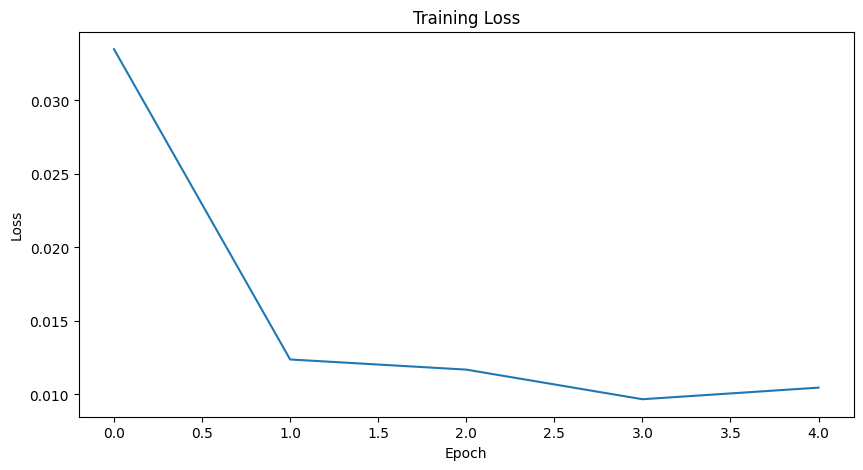

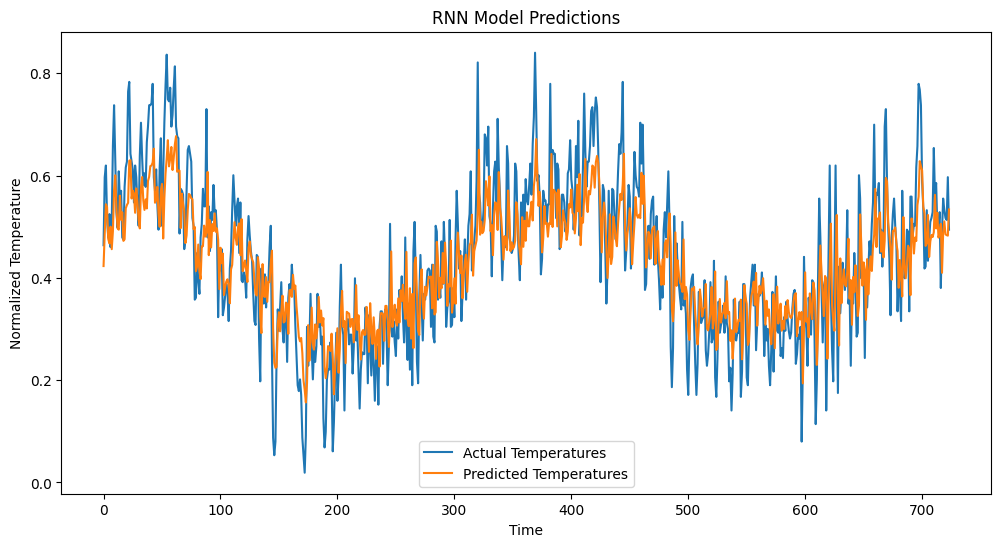


Training LSTM Model...
Epoch [1/5] Loss: 0.0307
Epoch [2/5] Loss: 0.0193
Epoch [3/5] Loss: 0.0143
Epoch [4/5] Loss: 0.0120
Epoch [5/5] Loss: 0.0116
Evaluating LSTM Model...


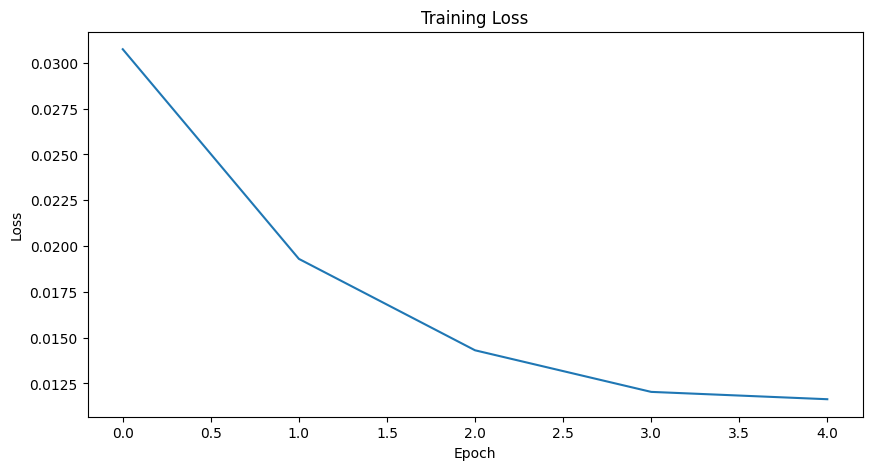

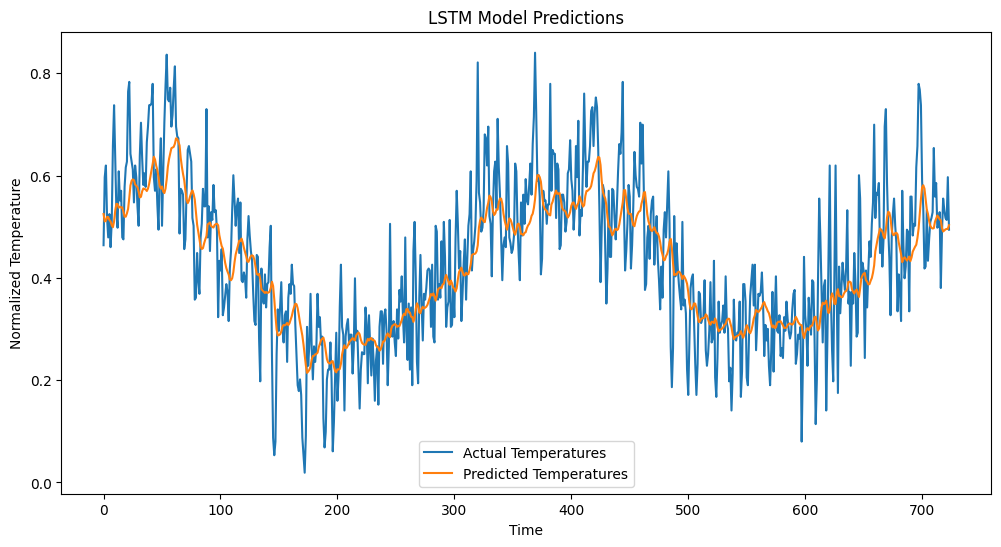


Training Transformer Model...
Epoch [1/5] Loss: 0.2255
Epoch [2/5] Loss: 0.0258
Epoch [3/5] Loss: 0.0181
Epoch [4/5] Loss: 0.0187
Epoch [5/5] Loss: 0.0166
Evaluating Transformer Model...


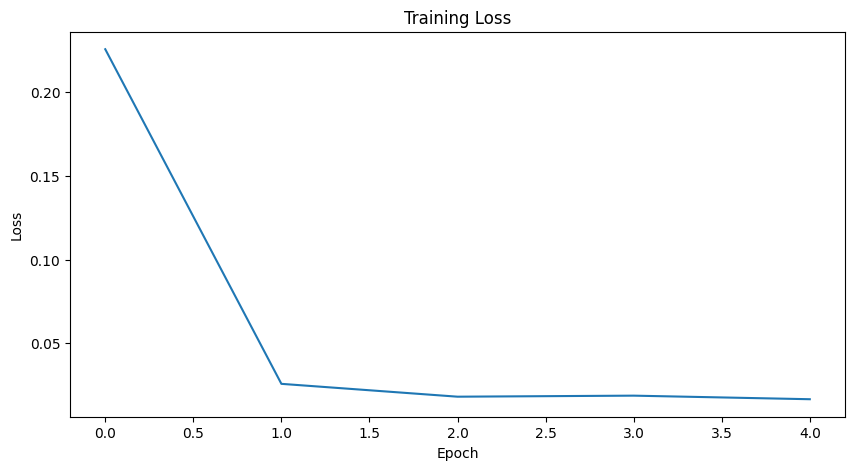

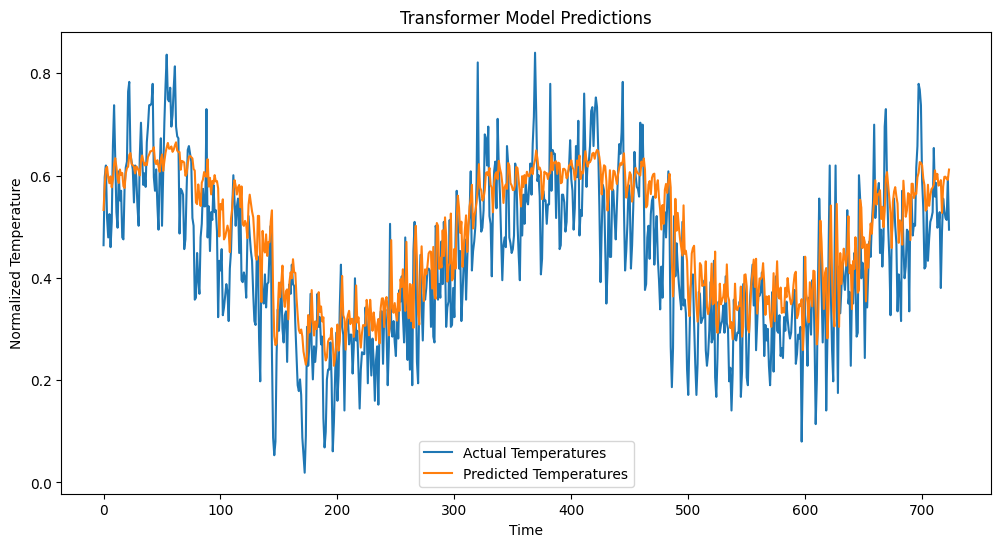

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [1/5] Loss: 0.1713
Epoch [2/5] Loss: 0.1713
Epoch [3/5] Loss: 0.1713
Epoch [4/5] Loss: 0.1713
Epoch [5/5] Loss: 0.1713

RNN Model Evaluation:
Mean Squared Error (MSE): 0.1837
Root Mean Squared Error (RMSE): 0.4286
Mean Absolute Error (MAE): 0.3989


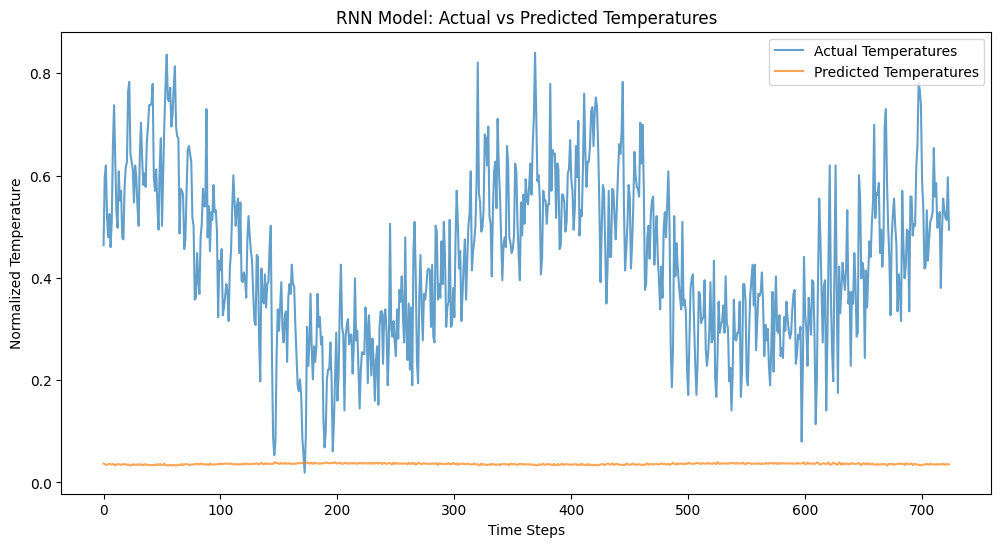

Epoch [1/5] Loss: 0.3251
Epoch [2/5] Loss: 0.3251
Epoch [3/5] Loss: 0.3251
Epoch [4/5] Loss: 0.3251
Epoch [5/5] Loss: 0.3251

LSTM Model Evaluation:
Mean Squared Error (MSE): 0.3420
Root Mean Squared Error (RMSE): 0.5848
Mean Absolute Error (MAE): 0.5637


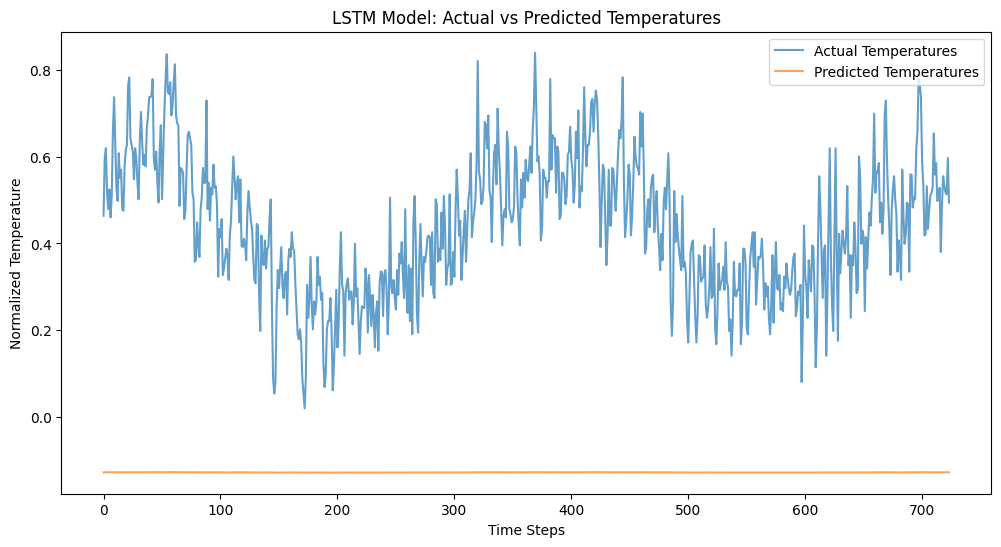

Epoch [1/5] Loss: 0.1196
Epoch [2/5] Loss: 0.1205
Epoch [3/5] Loss: 0.1217
Epoch [4/5] Loss: 0.1191
Epoch [5/5] Loss: 0.1212

Transformer Model Evaluation:
Mean Squared Error (MSE): 0.1124
Root Mean Squared Error (RMSE): 0.3353
Mean Absolute Error (MAE): 0.3120


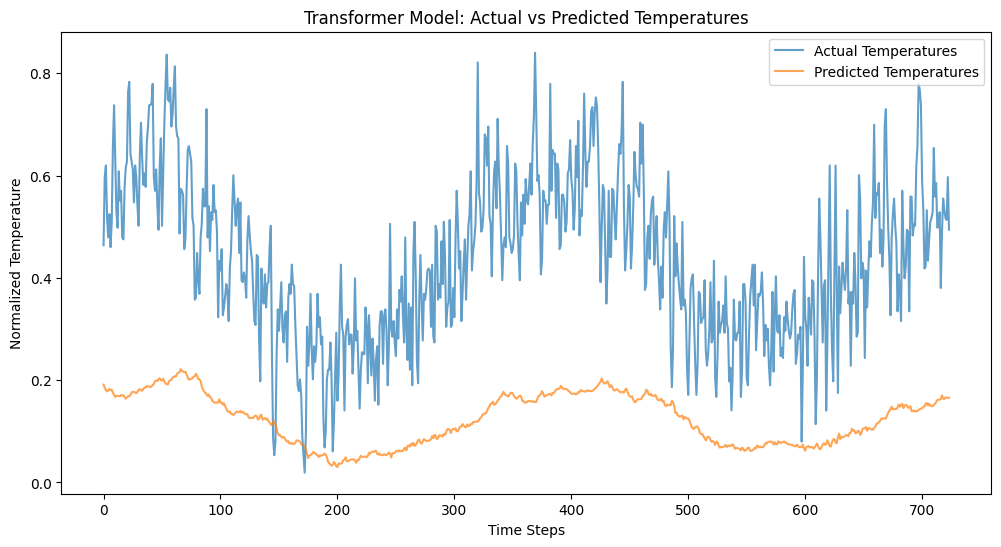


Model Comparison:
RNN Model - RMSE: 0.4286, MAE: 0.3989
LSTM Model - RMSE: 0.5848, MAE: 0.5637
Transformer Model - RMSE: 0.3353, MAE: 0.3120


In [ ]:
def main():
    # ... (previous data preparation code remains the same)
        # Load and preprocess data
    df = load_and_clean_data('/content/daily-minimum-temperatures-in-me.csv')

    # Normalize the temperature values
    scaler = MinMaxScaler()
    df['Temp'] = scaler.fit_transform(df[['Temp']])

    # Create sequences
    seq_length = 30
    data = df['Temp'].values
    sequences, targets = create_sequences(data, seq_length)

    # Split into training and testing sets
    train_size = int(len(sequences) * 0.8)
    train_sequences = sequences[:train_size]
    train_targets = targets[:train_size]
    test_sequences = sequences[train_size:]
    test_targets = targets[train_size:]

    # Create Dataset and DataLoader
    train_dataset = TensorDataset(torch.tensor(train_sequences, dtype=torch.float32), torch.tensor(train_targets, dtype=torch.float32))
    test_dataset = TensorDataset(torch.tensor(test_sequences, dtype=torch.float32), torch.tensor(test_targets, dtype=torch.float32))

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize models
    rnn_model = RNNModel(input_size=1, hidden_size=64, num_layers=2).to(device)
    lstm_model = LSTMModel(input_size=1, hidden_size=64, num_layers=2).to(device)
    transformer_model = TransformerModel(input_size=1, nhead=2, num_layers=2, hidden_dim=64).to(device)

    # Loss function and optimizers
    criterion = nn.MSELoss()
    optimizer_rnn = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
    optimizer_lstm = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
    optimizer_transformer = torch.optim.Adam(transformer_model.parameters(), lr=0.001)

    # Train and evaluate models
    models = [
        ('RNN', rnn_model, optimizer_rnn),
        ('LSTM', lstm_model, optimizer_lstm),
        ('Transformer', transformer_model, optimizer_transformer)
    ]

    for name, model, optimizer in models:
        print(f"\nTraining {name} Model...")
        history = train_regression_model(model, train_loader, criterion, optimizer, device)

        print(f"Evaluating {name} Model...")
        results = evaluate_regression_model(model, test_loader, criterion, device)
        loss = results['Average Loss']
        predictions = results['Predictions']
        actuals = results['Actuals']

        # Plot training history
        plot_training_history(history)

        # Plot actual vs predicted
        plt.figure(figsize=(12, 6))
        plt.plot(actuals, label='Actual Temperatures')
        plt.plot(predictions, label='Predicted Temperatures')
        plt.title(f'{name} Model Predictions')
        plt.xlabel('Time')
        plt.ylabel('Normalized Temperature')
        plt.legend()
        plt.show()

    # Evaluation function
    def print_model_metrics(model_name, results):
        print(f"\n{model_name} Model Evaluation:")
        print(f"Mean Squared Error (MSE): {results['MSE']:.4f}")
        print(f"Root Mean Squared Error (RMSE): {results['RMSE']:.4f}")
        print(f"Mean Absolute Error (MAE): {results['MAE']:.4f}")

        # Visualization of predictions vs actuals
        plt.figure(figsize=(12, 6))
        plt.plot(results['Actuals'], label='Actual Temperatures', alpha=0.7)
        plt.plot(results['Predictions'], label='Predicted Temperatures', alpha=0.7)
        plt.title(f'{model_name} Model: Actual vs Predicted Temperatures')
        plt.xlabel('Time Steps')
        plt.ylabel('Normalized Temperature')
        plt.legend()
        plt.show()

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Models and optimizers
    models = [
        ('RNN', RNNModel(input_size=1, hidden_size=64, num_layers=2).to(device),
         torch.optim.Adam(rnn_model.parameters(), lr=0.001)),
        ('LSTM', LSTMModel(input_size=1, hidden_size=64, num_layers=2).to(device),
         torch.optim.Adam(lstm_model.parameters(), lr=0.001)),
        ('Transformer', TransformerModel(input_size=1, nhead=2, num_layers=2, hidden_dim=64).to(device),
         torch.optim.Adam(transformer_model.parameters(), lr=0.001))
    ]

    # Criterion
    criterion = nn.MSELoss()

    # Comparative model evaluation
    model_results = {}
    for name, model, optimizer in models:
        # Train the model (using previous training function)
        train_regression_model(model, train_loader, criterion, optimizer, device)

        # Evaluate the model
        results = evaluate_regression_model(model, test_loader, criterion, device)
        model_results[name] = results

        # Print and visualize metrics
        print_model_metrics(name, results)

    # Optional: Comparative analysis
    print("\nModel Comparison:")
    for name, results in model_results.items():
        print(f"{name} Model - RMSE: {results['RMSE']:.4f}, MAE: {results['MAE']:.4f}")

if __name__ == '__main__':
    main()

#Image Classification and Segmentation: Oxford-IIIT Pet Dataset

Deep Dive into Training and Test Loss Optimization
Our Journey of Crafting a Robust Machine Learning Model

🔍 Dataset and Experimentation Overview
Exploring Training Dynamics:
In our recent experiments, we trained a machine learning model to minimize the loss between predictions and actual values. Each training epoch brought valuable insights into our model's performance on both the training and test datasets.

Here's what stood out:

Epochs Trained: 5
Observations at Epoch 5:
Training Loss: 2.3457
Test Loss: 3.2162
Optimal Epoch Identified: Epoch 4 achieved the minimum test loss, showing a balance between learning and generalization.
🧠 Key Insights from Training and Test Loss Trends
1️⃣ Performance Dynamics:
The training loss was consistently lower than the test loss—a typical pattern but one worth analyzing further. This gap suggests we may need to refine the model's ability to generalize.

2️⃣ The Sweet Spot (Optimal Epoch):
The lowest test loss at Epoch 4 tells us this is likely the best point to stop training. Beyond this, the model may overfit the training data, leading to diminished performance on unseen data.

3️⃣ Challenges We Noticed:

Potential Overfitting: The increasing gap between training and test loss warns us that overfitting could creep in if training continues for too long.
Loss Stability: Loss values were steady but hinted at room for improvement with further fine-tuning.
🔧 Our Optimization Toolkit
Here’s what we plan to do next to enhance our model’s performance:

Early Stopping:
We'll implement early stopping to halt training when test loss stops improving. This will save both computation time and prevent overfitting.

Learning Rate Fine-Tuning:
Adjusting the learning rate can stabilize the loss and ensure smoother convergence. A smaller learning rate might yield better results.

Regularization Techniques:
Add Dropout layers to reduce overfitting by randomly deactivating neurons during training.
Introduce L2 regularization to discourage excessively complex weights, promoting simplicity.
Visualization and Tracking:
Visualizing training and test loss trends will give us a clearer picture of the model’s learning journey. This will also help in identifying overfitting early on.

🔬 Empirical Observations and Recommendations
Our Big Takeaways:

Training deeper models isn’t always better—it's all about finding the right balance.
Generalization matters more than memorization. By keeping an eye on the test loss, we can ensure our model performs well on unseen data.
💡 Future Directions and Aspirations
Reflecting on this experience, we’re excited to explore:

Advanced Architectures: Leveraging hybrid models like CNN-RNN or Transformers to handle more complex datasets.
Automated Optimization: Integrating tools like AutoML for hyperparameter tuning and architecture refinement.
Explainable AI (XAI): Developing interpretable models to make our solutions transparent and trustworthy.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import OxfordIIITPet
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
class DataProcess:
    def __init__(self, resize=(128, 128)):
        self.resize = resize
        # Image transformations
        self.transform_image = transforms.Compose([
            transforms.Resize(self.resize),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
        ])
        # Mask transformations
        self.transform_mask = transforms.Compose([
            transforms.Resize(self.resize, interpolation=Image.NEAREST),
            transforms.ToTensor()
        ])

    def load_oxford_pet(self, root='./data'):
        dataset = OxfordIIITPet(
            root=root,
            download=True,
            target_types=['category', 'segmentation']
        )
        return dataset

    def preprocess_oxford_pet(self, dataset):
        # Initialize lists to store processed data
        processed_images = []
        processed_masks = []
        processed_labels = []

        print("Processing dataset...")
        for idx, (img, targets) in enumerate(dataset):
            try:
                # Apply transformations
                transformed_img = self.transform_image(img)
                transformed_mask = self.transform_mask(targets[1])  # targets[1] is the segmentation mask
                label = targets[0]  # targets[0] is the category label

                # Convert to numpy and append
                processed_images.append(transformed_img.numpy())
                processed_masks.append(transformed_mask.numpy())
                processed_labels.append(label)

            except Exception as e:
                print(f"Error processing sample {idx}: {str(e)}")
                continue

        # Convert lists to numpy arrays
        processed_images = np.array(processed_images)
        processed_masks = np.array(processed_masks)
        processed_labels = np.array(processed_labels)

        # Split the data
        train_idx, test_idx = train_test_split(
            np.arange(len(processed_labels)),
            test_size=0.2,
            random_state=42,
            stratify=processed_labels
        )

        # Create train and test sets
        train_images = processed_images[train_idx]
        test_images = processed_images[test_idx]
        train_masks = processed_masks[train_idx]
        test_masks = processed_masks[test_idx]
        train_labels = processed_labels[train_idx]
        test_labels = processed_labels[test_idx]

        return (train_images, test_images,
                train_labels, test_labels,
                train_masks, test_masks)

In [ ]:
class PetDataset(Dataset):
    def __init__(self, images, masks, labels):
        """
        Args:
            images (np.ndarray): Image data with shape (N, C, H, W)
            masks (np.ndarray): Mask data with shape (N, 1, H, W)
            labels (np.ndarray): Label data with shape (N,)
        """
        self.images = images
        self.masks = masks
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Convert numpy arrays to tensors
        image = torch.from_numpy(self.images[idx]).float()
        mask = torch.from_numpy(self.masks[idx]).float()
        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return image, mask, label

In [ ]:
# Neural Network Classes

# CNN for Classification
class CNN(nn.Module):
    def __init__(self, num_classes=37):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 512)  # Adjust these numbers based on your input size
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 16)  # Adjust these numbers based on your input size
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# U-Net for Segmentation
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # Encoder
        self.enc1 = self.conv_block(3, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        # Decoder
        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128)
        self.up3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(128, 64)

        self.final = nn.Conv2d(64, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU()
        )
        return block

    def forward(self, x):
        enc1 = self.enc1(x)
        enc2 = self.enc2(nn.MaxPool2d(2,2)(enc1))
        enc3 = self.enc3(nn.MaxPool2d(2,2)(enc2))
        enc4 = self.enc4(nn.MaxPool2d(2,2)(enc3))

        dec1 = self.up1(enc4)
        dec1 = torch.cat((dec1, enc3), dim=1)
        dec1 = self.dec1(dec1)

        dec2 = self.up2(dec1)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)

        dec3 = self.up3(dec2)
        dec3 = torch.cat((dec3, enc1), dim=1)
        dec3 = self.dec3(dec3)

        out = self.final(dec3)
        return out

# Recurrent Neural Networks

# Simple RNN
class RNNModel(nn.Module):
    def __init__(self, input_size=30, hidden_size=64, num_layers=2):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, nonlinearity='tanh', batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=30, hidden_size=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Transformer
class TransformerModel(nn.Module):
    def __init__(self, input_size=30, nhead=4, num_layers=2, hidden_dim=128):
        super(TransformerModel, self).__init__()
        self.transformer = nn.Transformer(
            d_model=input_size,
            nhead=nhead,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=hidden_dim
        )
        self.fc = nn.Linear(input_size, 1)

    def forward(self, src, tgt):
        out = self.transformer(src, tgt)
        out = self.fc(out[-1,:,:])
        return out


In [ ]:
class History:
    def __init__(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        self.dice_scores = []  # For UNet
        self.mse_scores = []   # For regression
        self.mae_scores = []   # For regression
        self.rmse_scores = []  # For regression

    def update(self, train_loss, val_loss, train_acc=None, val_acc=None,
               dice_score=None, mse=None, mae=None, rmse=None):
        self.train_loss.append(train_loss)
        self.val_loss.append(val_loss)
        if train_acc is not None:
            self.train_acc.append(train_acc)
        if val_acc is not None:
            self.val_acc.append(val_acc)
        if dice_score is not None:
            self.dice_scores.append(dice_score)
        if mse is not None:
            self.mse_scores.append(mse)
        if mae is not None:
            self.mae_scores.append(mae)
        if rmse is not None:
            self.rmse_scores.append(rmse)

    def plot_metrics(self, metric_type='loss'):
        plt.figure(figsize=(12, 6))

        if metric_type == 'loss':
            plt.plot(self.train_loss, label='Training Loss')
            plt.plot(self.val_loss, label='Validation Loss')
            plt.title('Model Loss')
            plt.ylabel('Loss')

        elif metric_type == 'accuracy' and len(self.train_acc) > 0:
            plt.plot(self.train_acc, label='Training Accuracy')
            plt.plot(self.val_acc, label='Validation Accuracy')
            plt.title('Model Accuracy')
            plt.ylabel('Accuracy')

        elif metric_type == 'dice' and len(self.dice_scores) > 0:
            plt.plot(self.dice_scores, label='Dice Score')
            plt.title('Dice Coefficient')
            plt.ylabel('Score')

        elif metric_type == 'regression' and len(self.mse_scores) > 0:
            plt.plot(self.mse_scores, label='MSE')
            plt.plot(self.mae_scores, label='MAE')
            plt.plot(self.rmse_scores, label='RMSE')
            plt.title('Regression Metrics')
            plt.ylabel('Error')

        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

In [ ]:
# Task 1.3: Training and Evaluation
def train_model(model, train_loader, test_loader, criterion, optimizer, device, epochs=2, early_stopping_patience=5):
    model.train()
    best_loss = float('inf')
    patience_counter = 0

    # Initialize history dictionary
    history = {'train_loss': [], 'test_loss': []}

    for epoch in range(epochs):
        running_train_loss = 0.0
        model.train()  # Ensure model is in training mode

        # Training loop
        for images, masks, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        # Compute average training loss
        epoch_train_loss = running_train_loss / len(train_loader)
        history['train_loss'].append(epoch_train_loss)

        # Evaluate on test/validation set
        model.eval()  # Set model to evaluation mode
        running_test_loss = 0.0
        with torch.no_grad():
            for images, masks, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_test_loss += loss.item()

        # Compute average test loss
        epoch_test_loss = running_test_loss / len(test_loader)
        history['test_loss'].append(epoch_test_loss)

        # Early stopping logic
        if epoch_test_loss < best_loss:
            best_loss = epoch_test_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break

        print(f'Epoch [{epoch+1}/{epochs}] Training Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')

    return history

def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, masks, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(test_loader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

In [ ]:
def plot_train_test_history(history):
    epochs = range(1, len(history['train_loss']) + 1)
    train_loss = history['train_loss']
    test_loss = history['test_loss']

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, test_loss, 'r-', label='Test Loss')

    # Identify the epoch with minimum test loss
    min_test_loss = min(test_loss)
    min_epoch = test_loss.index(min_test_loss) + 1  # Adding 1 since epochs start from 1
    plt.scatter(min_epoch, min_test_loss, s=100, c='green', marker='o', label='Minimum Test Loss')

    # Annotate the minimum test loss point
    plt.annotate(f'Min Test Loss\nEpoch: {min_epoch}',
                 xy=(min_epoch, min_test_loss),
                 xytext=(min_epoch, min_test_loss + 0.05),
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 horizontalalignment='left')

    plt.title('Training and Test Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# # train_unet function: trains a U-Net model
# def train_unet(model, train_loader, test_loader, criterion, optimizer, device, epochs=2, early_stopping_patience=5):
#     model.to(device)
#     history = {'train_loss': [], 'train_dice': [], 'val_loss': [], 'val_dice': []}
#     best_loss = float('inf')
#     patience_counter = 0

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0
#         train_dice_scores = []

#         for images, masks, _ in train_loader:
#             images = images.to(device)
#             masks = masks.to(device)

#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, masks)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#             # Calculate Dice coefficient for training
#             pred_masks = (torch.sigmoid(outputs) > 0.5).float()
#             train_dice = dice_coef(pred_masks.cpu().numpy(), masks.cpu().numpy())
#             train_dice_scores.append(train_dice)

#         train_loss = running_loss / len(train_loader)
#         avg_train_dice = np.mean(train_dice_scores)

#         # Validation step
#         val_loss, avg_val_dice = evaluate_unet(model, val_loader, criterion, device)

#         # Update history
#         history['train_loss'].append(train_loss)
#         history['train_dice'].append(avg_train_dice)
#         history['val_loss'].append(val_loss)
#         history['val_dice'].append(avg_val_dice)

#         print(f"Epoch [{epoch+1}/{epochs}] "
#               f"Train Loss: {train_loss:.4f}, Train Dice: {avg_train_dice:.4f}, "
#               f"Val Loss: {val_loss:.4f}, Val Dice: {avg_val_dice:.4f}")

#         # Early stopping
#         if val_loss < best_loss:
#             best_loss = val_loss
#             patience_counter = 0
#             torch.save(model.state_dict(), 'best_unet_model.pth')
#         else:
#             patience_counter += 1

#         if patience_counter >= early_stopping_patience:
#             print(f'Early stopping triggered after {epoch+1} epochs.')
#             break

#     return history


# # evaluate_unet function: evaluates the U-Net model
# def evaluate_unet(model, val_loader, criterion, device):
#     model.eval()
#     total_loss = 0
#     dice_scores = []

#     with torch.no_grad():
#         for images, masks, _ in val_loader:
#             images = images.to(device)
#             masks = masks.to(device)

#             outputs = model(images)
#             loss = criterion(outputs, masks)
#             total_loss += loss.item()

#             # Calculate Dice coefficient
#             pred_masks = (torch.sigmoid(outputs) > 0.5).float()
#             dice = dice_coef(pred_masks.cpu().numpy(), masks.cpu().numpy())
#             dice_scores.append(dice)

#     avg_loss = total_loss / len(val_loader)
#     avg_dice = np.mean(dice_scores)

#     return avg_loss, avg_dice


# # train_regression_model function: trains a regression model
# def train_regression_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=2, early_stopping_patience=5):
#     model.to(device)
#     history = {'train_loss': [], 'val_loss': [], 'val_metrics': []}
#     best_loss = float('inf')
#     patience_counter = 0

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0

#         for sequences, targets in train_loader:
#             sequences = sequences.to(device).unsqueeze(-1)
#             targets = targets.to(device).unsqueeze(-1)

#             optimizer.zero_grad()
#             outputs = model(sequences)
#             loss = criterion(outputs, targets)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         train_loss = running_loss / len(train_loader)

#         # Validation step
#         val_loss, val_metrics = evaluate_regression_model(model, val_loader, criterion, device)

#         # Update history
#         history['train_loss'].append(train_loss)
#         history['val_loss'].append(val_loss)
#         history['val_metrics'].append(val_metrics)

#         print(f"Epoch [{epoch+1}/{epochs}] "
#               f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
#               f"Val Metrics: {val_metrics}")

#         # Early stopping
#         if val_loss < best_loss:
#             best_loss = val_loss
#             patience_counter = 0
#             torch.save(model.state_dict(), 'best_regression_model.pth')
#         else:
#             patience_counter += 1

#         if patience_counter >= early_stopping_patience:
#             print(f'Early stopping triggered after {epoch+1} epochs.')
#             break

#     return history


# # evaluate_regression_model function: evaluates the regression model
# def evaluate_regression_model(model, val_loader, criterion, device):
#     model.eval()
#     total_loss = 0
#     predictions = []
#     actuals = []

#     with torch.no_grad():
#         for sequences, targets in val_loader:
#             sequences = sequences.to(device).unsqueeze(-1)
#             targets = targets.to(device).unsqueeze(-1)

#             outputs = model(sequences)
#             loss = criterion(outputs, targets)
#             total_loss += loss.item()

#             predictions.extend(outputs.cpu().numpy().flatten())
#             actuals.extend(targets.cpu().numpy().flatten())

#     avg_loss = total_loss / len(val_loader)
#     mse = mean_squared_error(actuals, predictions)
#     mae = mean_absolute_error(actuals, predictions)
#     rmse = np.sqrt(mse)

#     val_metrics = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}
#     return avg_loss, val_metrics


# # Helper function for Dice coefficient calculation
# def dice_coef(pred, target):
#     intersection = np.sum(pred * target)
#     union = np.sum(pred) + np.sum(target)
#     if union == 0:
#         return 1.0
#     return 2.0 * intersection / union


In [ ]:
# Transformer Training and Evaluation
class TransformerDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        src = torch.tensor(self.sequences[idx], dtype=torch.float32).unsqueeze(1)  # (seq_len, feature)
        tgt = torch.tensor([self.targets[idx]], dtype=torch.float32)  # (1)
        return src, tgt

def train_transformer(model, dataloader, criterion, optimizer, device, epochs=2, early_stopping_patience=5):
    model.to(device)
    best_loss = float('inf')
    patience = early_stopping_patience
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for src, tgt in dataloader:
            src = src.to(device).permute(1, 0, 2)  # Transformer expects (seq_len, batch, feature)
            tgt_input = src  # For simplicity, using src as tgt_input
            tgt = tgt.to(device).unsqueeze(0)  # (1, batch, 1)

            optimizer.zero_grad()
            outputs = model(src, tgt_input)
            loss = criterion(outputs, tgt)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(dataloader)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

        if epoch_loss < best_loss:
            best_loss = epoch_loss
            patience = early_stopping_patience
            # Save the best model if needed
        else:
            patience -= 1
            if patience == 0:
                print("Early stopping")
                break

def evaluate_transformer(model, dataloader, criterion, device):
    model.eval()
    model.to(device)
    running_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for src, tgt in dataloader:
            src = src.to(device).permute(1, 0, 2)
            tgt_input = src
            tgt = tgt.to(device).unsqueeze(0)
            outputs = model(src, tgt_input)
            loss = criterion(outputs, tgt)
            running_loss += loss.item()
            all_preds.extend(outputs.cpu().numpy().flatten())
            all_targets.extend(tgt.cpu().numpy().flatten())

    epoch_loss = running_loss / len(dataloader)
    mae = np.mean(np.abs(np.array(all_preds) - np.array(all_targets)))
    rmse = np.sqrt(np.mean((np.array(all_preds) - np.array(all_targets))**2))
    print(f'Loss: {epoch_loss:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')

# Visualization Functions
def visualize_training_history(history, metric='loss'):
    plt.figure(figsize=(10,6))
    plt.plot(history['train'], label='Train')
    plt.plot(history['val'], label='Validation')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

def visualize_segmentation_results(model, dataloader, device, num_samples=5):
    model.eval()
    model.to(device)
    samples = 0
    with torch.no_grad():
        for inputs, masks, _ in dataloader:
            inputs = inputs.to(device)
            masks = masks.to(device)
            outputs = model(inputs)
            preds = torch.sigmoid(outputs) > 0.5
            for i in range(inputs.size(0)):
                if samples >= num_samples:
                    return
                img = inputs[i].cpu().permute(1, 2, 0).numpy()
                img = (img * 0.5) + 0.5  # Denormalize
                mask = masks[i].cpu().squeeze().numpy()
                pred = preds[i].cpu().squeeze().numpy()

                fig, axs = plt.subplots(1,3, figsize=(15,5))
                axs[0].imshow(img)
                axs[0].set_title('Input Image')
                axs[1].imshow(mask, cmap='gray')
                axs[1].set_title('Ground Truth Mask')
                axs[2].imshow(pred, cmap='gray')
                axs[2].set_title('Predicted Mask')
                plt.show()
                samples += 1


In [ ]:
def plot_predictions(model, test_loader, device, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))

    with torch.no_grad():
        for i, (images, masks, _) in enumerate(test_loader):
            if i >= num_samples:
                break

            images = images.to(device)
            masks = masks.squeeze(1).cpu().numpy()
            predictions = torch.sigmoid(model(images)).squeeze(1).cpu().numpy() > 0.5

            axes[i, 0].imshow(images[0].permute(1,2,0).cpu().numpy())
            axes[i, 0].set_title('Input Image')
            axes[i, 1].imshow(masks[0], cmap='gray')
            axes[i, 1].set_title('Ground Truth')
            axes[i, 2].imshow(predictions[0], cmap='gray')
            axes[i, 2].set_title('Prediction')

    plt.tight_layout()
    plt.show()

def plot_time_series_predictions(model, test_loader, scaler, device):
    model.eval()
    predictions = []
    targets = []

    with torch.no_grad():
        for sequences, target in test_loader:
            sequences = sequences.to(device)
            output = model(sequences)
            predictions.extend(scaler.inverse_transform(output.cpu().numpy()))
            targets.extend(scaler.inverse_transform(target.numpy()))

    plt.figure(figsize=(12, 6))
    plt.plot(targets, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title('Time Series Prediction Results')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

Loading Oxford-IIIT Pet Dataset...


100%|██████████| 792M/792M [00:21<00:00, 36.9MB/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19.2M/19.2M [00:01<00:00, 16.7MB/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet
Preprocessing dataset...
Processing dataset...
Training samples: 2944
Testing samples: 736
Using device: cpu

Training CNN...
Epoch [1/5] Training Loss: 3.5773, Test Loss: 3.4749
Epoch [2/5] Training Loss: 3.3826, Test Loss: 3.3871
Epoch [3/5] Training Loss: 3.1626, Test Loss: 3.2289
Epoch [4/5] Training Loss: 2.8420, Test Loss: 3.2114
Epoch [5/5] Training Loss: 2.3457, Test Loss: 3.2162


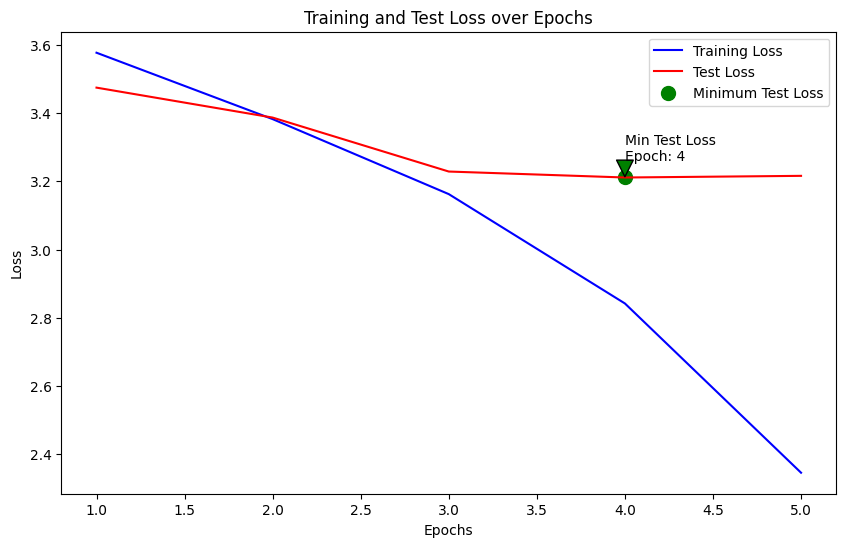


Evaluating CNN...
Test Loss: 3.2162, Accuracy: 13.72%


In [ ]:
if __name__ == "__main__":
    # Initialize data processor
    data_processor = DataProcess(resize=(128, 128))

    print("Loading Oxford-IIIT Pet Dataset...")
    pet_dataset = data_processor.load_oxford_pet()

    print("Preprocessing dataset...")
    try:
        (train_images, test_images,
         train_labels, test_labels,
         train_masks, test_masks) = data_processor.preprocess_oxford_pet(pet_dataset)

        # Create dataset objects
        train_dataset = PetDataset(train_images, train_masks, train_labels)
        test_dataset = PetDataset(test_images, test_masks, test_labels)

        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        print(f"Training samples: {len(train_dataset)}")
        print(f"Testing samples: {len(test_dataset)}")

        # Initialize device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {device}")

        # Initialize models
        cnn_model = CNN(num_classes=37).to(device)
        unet_model = UNet().to(device)

        # Define loss functions and optimizers
        criterion_cls = nn.CrossEntropyLoss()
        criterion_seg = nn.BCEWithLogitsLoss()

        optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)
        optimizer_unet = optim.Adam(unet_model.parameters(), lr=0.001)

        # Train and evaluate CNN
        print("\nTraining CNN...")
        cnn_history = train_model(
            model=cnn_model,
            train_loader=train_loader,
            test_loader=test_loader,
            criterion=criterion_cls,
            optimizer=optimizer_cnn,
            device=device,
            epochs=5,
            early_stopping_patience=5
        )

        # Plot training and test loss curves for CNN
        plot_train_test_history(cnn_history)

        # Evaluate CNN
        print("\nEvaluating CNN...")
        test_loss, test_accuracy = evaluate_model(cnn_model, test_loader, criterion_cls, device)
        print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

        # # Train and evaluate U-Net
        # print("\nTraining U-Net...")
        # unet_history = train_unet(
        #     model=unet_model,
        #     train_loader=train_loader,
        #     test_loader=test_loader,
        #     criterion=criterion_seg,
        #     optimizer=optimizer_unet,
        #     device=device,
        #     epochs=2,
        #     early_stopping_patience=5
        # )

        # # Plot training and validation loss curves for U-Net
        # plot_train_test_history(unet_history)

        # # Evaluate U-Net
        # print("\nEvaluating U-Net...")
        # val_loss = evaluate_unet(unet_model, test_loader, criterion_seg, device)
        # print(f'Validation Loss: {val_loss:.4f}')

    except Exception as e:
        print(f"An error occurred during processing: {str(e)}")
        raise